In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# load the training and testing data, scale it into the range [0, 1],

print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
# then reshape the design matrix


[INFO] loading CIFAR-10 data...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
print(trainX.shape)
print(testX.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [2]:
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(512, input_shape=(3072,), activation="relu"))
model.add(Dense(128, activation="tanh"))
model.add(Dense(10, activation="softmax"))

# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=100, batch_size=32)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO] training network...
Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2883 - loss: 1.9613 - val_accuracy: 0.3936 - val_loss: 1.7002
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3980 - loss: 1.6941 - val_accuracy: 0.4250 - val_loss: 1.6208
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4311 - loss: 1.6047 - val_accuracy: 0.4243 - val_loss: 1.6151
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4575 - loss: 1.5282 - val_accuracy: 0.4516 - val_loss: 1.5652
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4742 - loss: 1.4802 - val_accuracy: 0.4753 - val_loss: 1.4645
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4914 - loss: 1.4378 - val_accuracy: 0.4532 - val_loss: 1.5363
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5027 - loss: 1.4035 - val_accuracy: 0.4671 - val_loss: 1.5360
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step -

[INFO] evaluating network...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.62      0.60      0.61      1000
  automobile       0.65      0.61      0.63      1000
        bird       0.44      0.45      0.45      1000
         cat       0.36      0.38      0.37      1000
        deer       0.54      0.35      0.42      1000
         dog       0.46      0.37      0.41      1000
        frog       0.52      0.69      0.60      1000
       horse       0.62      0.58      0.60      1000
        ship       0.61      0.70      0.65      1000
       truck       0.53      0.61      0.57      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.53      0.53     10000
weighted avg       0.54      0.54      0.53     10000



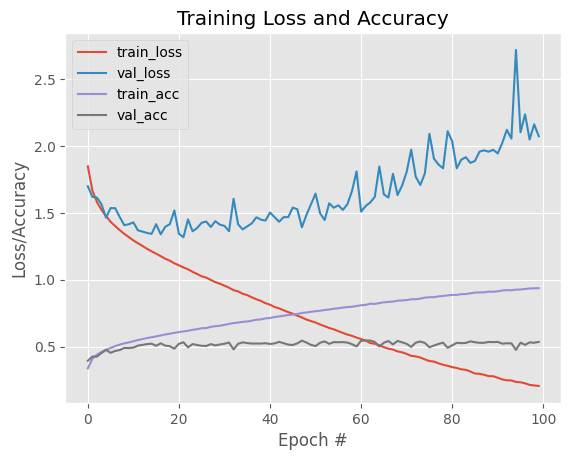

In [3]:

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()